**Library Imports**

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import os
import seaborn as sns

from scipy.stats import zscore

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from matplotlib import pyplot
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
from IPython.display import display

from imblearn.over_sampling import SMOTE

import tensorflow as tf

Panda Preferences

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

Read CSV

In [3]:
df_train = pd.read_csv("../Datasets/IoT-23_train_smote.csv")
display(df_train)

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,bwd_header_size_tot,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,type,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,fwd_header_size_min_0,fwd_header_size_min_8,fwd_header_size_min_20,fwd_header_size_min_24,fwd_header_size_min_32,fwd_header_size_min_40,fwd_header_size_min_44,fwd_header_size_max_0,fwd_header_size_max_8,fwd_header_size_max_20,fwd_header_size_max_24,fwd_header_size_max_32,fwd_header_size_max_40,fwd_header_size_max_44,bwd_header_size_min_0,bwd_header_size_min_8,bwd_header_size_min_20,bwd_header_size_min_24,bwd_header_size_min_32,bwd_header_size_min_40,bwd_header_size_min_44,bwd_header_size_max_0,bwd_header_size_max_8,bwd_header_size_max_20,bwd_header_size_max_24,bwd_header_size_max_32,bwd_header_size_max_40,bwd_header_size_max_44,bwd_header_size_max_52,flow_FIN_flag_count_0,flow_FIN_flag_count_1,flow_FIN_flag_count_2,flow_FIN_flag_count_3,flow_FIN_flag_count_4,flow_FIN_flag_count_5,flow_FIN_flag_count_6,flow_FIN_flag_count_7,flow_SYN_flag_count_0,flow_SYN_flag_count_1,flow_SYN_flag_count_2,flow_SYN_flag_count_3,flow_SYN_flag_count_4,flow_SYN_flag_count_5,flow_SYN_flag_count_6,flow_SYN_flag_count_7,flow_SYN_flag_count_8,flow_SYN_flag_count_9,flow_SYN_flag_count_10,flow_RST_flag_count_0,flow_RST_flag_count_1,flow_RST_flag_count_2,flow_RST_flag_count_3,flow_RST_flag_count_4,history_originator_0,history_originator_1,history_originator_2,history_originator_3,history_originator_4,history_originator_5,history_originator_6,history_responder_0,history_responder_1,history_responder_2,history_responder_3,history_responder_4,history_responder_5
0,-0.014679,-0.179829,-0.005091,0,-0.044214,-0.223505,-0.756566,-0.651330,-0.014679,-0.044214,-0.756566,-0.184151,-0.046843,-0.778440,-0.777869,-0.778499,-1.303156,-0.563255,-0.589983,-0.184780,-0.040003,-0.499835,-0.071549,-0.224057,-0.170028,-0.202208,-0.218073,-0.026854,-0.0416,-0.042557,-0.034801,-0.029821,-0.033188,-0.224624,-0.170656,-0.208086,-0.221173,0.712756,0.273386,-0.002815,0.505192,-0.366493,-0.094334,-0.191905,-0.136594,-0.176039,-0.170188,0.700756,0.258094,-0.014705,0.494734,-0.371757,-0.016764,-0.166467,-1.229442,-0.211130,-0.033546,-0.004556,-0.003094,-0.004674,-0.003342,-0.002221,-0.001499,-0.210402,-0.211092,-0.207410,-0.057970,0.567019,0.279126,0.022051,0.428915,-0.303942,-0.801662,-0.708314,-0.725170,-0.653861,udp_flood,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,-0.405701,-0.179829,-0.005091,0,-0.044214,-0.223505,-0.756566,-0.651330,-0.405701,-0.044214,-0.756566,-0.184151,-0.046843,-0.778416,-0.777869,-0.778487,-1.303156,-0.563255,-0.589983,-0.184780,-0.04

In [4]:
df_test = pd.read_csv("../Datasets/dataset_andpre/EdgeIIot_test.csv")
display(df_test)

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,bwd_header_size_tot,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,type,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,fwd_header_size_min_0,fwd_header_size_min_8,fwd_header_size_min_20,fwd_header_size_min_24,fwd_header_size_min_32,fwd_header_size_min_40,fwd_header_size_min_44,fwd_header_size_max_0,fwd_header_size_max_8,fwd_header_size_max_20,fwd_header_size_max_24,fwd_header_size_max_32,fwd_header_size_max_40,fwd_header_size_max_44,bwd_header_size_min_0,bwd_header_size_min_8,bwd_header_size_min_20,bwd_header_size_min_24,bwd_header_size_min_32,bwd_header_size_min_40,bwd_header_size_min_44,bwd_header_size_max_0,bwd_header_size_max_8,bwd_header_size_max_20,bwd_header_size_max_24,bwd_header_size_max_32,bwd_header_size_max_40,bwd_header_size_max_44,bwd_header_size_max_52,flow_FIN_flag_count_0,flow_FIN_flag_count_1,flow_FIN_flag_count_2,flow_FIN_flag_count_3,flow_FIN_flag_count_4,flow_FIN_flag_count_5,flow_FIN_flag_count_6,flow_FIN_flag_count_7,flow_SYN_flag_count_0,flow_SYN_flag_count_1,flow_SYN_flag_count_2,flow_SYN_flag_count_3,flow_SYN_flag_count_4,flow_SYN_flag_count_5,flow_SYN_flag_count_6,flow_SYN_flag_count_7,flow_SYN_flag_count_8,flow_SYN_flag_count_9,flow_SYN_flag_count_10,flow_RST_flag_count_0,flow_RST_flag_count_1,flow_RST_flag_count_2,flow_RST_flag_count_3,flow_RST_flag_count_4,history_originator_0,history_originator_1,history_originator_2,history_originator_3,history_originator_4,history_originator_5,history_originator_6,history_responder_0,history_responder_1,history_responder_2,history_responder_3,history_responder_4,history_responder_5
0,-0.540587,-0.179829,-0.005091,0,-0.302948,-0.211850,0.113379,0.010046,-0.540587,-0.302948,0.113379,-0.184151,-0.046843,1.467120,1.469549,1.468985,0.708010,-0.039559,-0.047807,-0.184780,-0.040003,-0.053936,-0.071549,-0.224057,-0.170028,-0.202208,-0.218073,-0.026854,-0.0416,-0.042557,-0.034801,-0.029821,-0.033188,-0.224624,-0.170656,-0.208086,-0.221173,-0.412900,-0.545421,-0.528133,-0.513173,-0.366493,-0.094334,-0.191905,-0.136594,-0.176039,-0.170188,-0.430596,-0.566738,-0.540613,-0.530154,-0.371757,-0.016764,-0.166467,0.638795,-0.211130,-0.033546,-0.004556,-0.003094,-0.004674,-0.003342,-0.002221,-0.001499,-0.210396,-0.211087,-0.207405,-0.05797,-0.477199,-0.536505,-0.510501,-0.528202,-0.303942,1.264714,-0.708314,1.400702,-0.653861,http_flood,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,-0.540588,-0.179829,-0.005091,0,-0.302948,-0.211850,0.113379,0.010046,-0.540588,-0.302948,0.113379,-0.184151,-0.046843,1.552666,1.555165,1.554603,0.708010,-0.039559,-0.047807,-0.184780,-0.040003,-0

---------------------------------------

**Create Model & Train Model**

In [5]:
df_train['is_attack'] = df_train['type'].apply(lambda x: 0 if x == "normal" else 1)
df_train.groupby('is_attack')['is_attack'].count()

is_attack
0      9058
1    349094
Name: is_attack, dtype: int64

In [6]:
df_test['is_attack'] = df_test['type'].apply(lambda x: 0 if x == "normal" else 1)
df_test.groupby('is_attack')['is_attack'].count()

is_attack
0     2310
1    87228
Name: is_attack, dtype: int64

In [7]:
df_train = df_train.drop('type', axis=1)
df_test = df_test.drop('type', axis=1)

In [8]:
x_columns = df_train.columns.drop('is_attack')

le = LabelEncoder()
le.fit(df_train["is_attack"].values)

x = df_train[x_columns].values
y = df_train["is_attack"].values
y = le.transform(y)

In [9]:
x_columns_val = df_test.columns.drop('is_attack')

le = LabelEncoder()
le.fit(df_test["is_attack"].values)

x_val = df_test[x_columns].values
y_val = df_test["is_attack"].values
y_val = le.transform(y_val)

In [10]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [11]:
x_test.shape,y_test.shape

((89538, 158), (89538,))

In [12]:
x_train.shape,y_train.shape

((268614, 158), (268614,))

In [13]:
x_val.shape, y_val.shape

((89538, 158), (89538,))

In [14]:
# Define the model
model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Define early stopping
monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",factor=0.5,mode="min",patience=10,verbose=1,min_lr=1e-7)
checkpoint = ModelCheckpoint('best_model_binary_smote.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=512, callbacks=[monitor, checkpoint])

Train on 268614 samples, validate on 89538 samples
Epoch 1/100
268614/268614 [==============================] - 2s 7us/sample - loss: 0.3043 - accuracy: 0.9208 - val_loss: 0.0652 - val_accuracy: 0.9842
Epoch 2/100
268614/268614 [==============================] - 1s 4us/sample - loss: 0.0801 - accuracy: 0.9820 - val_loss: 0.0423 - val_accuracy: 0.9842
Epoch 3/100
268614/268614 [==============================] - 1s 4us/sample - loss: 0.0562 - accuracy: 0.9828 - val_loss: 0.0373 - val_accuracy: 0.9861
Epoch 4/100
268614/268614 [==============================] - 1s 4us/sample - loss: 0.0484 - accuracy: 0.9832 - val_loss: 0.0354 - val_accuracy: 0.9861
Epoch 5/100
268614/268614 [==============================] - 1s 4us/sample - loss: 0.0436 - accuracy: 0.9832 - val_loss: 0.0329 - val_accuracy: 0.9850
Epoch 6/100
268614/268614 [==============================] - 1s 4us/sample - loss: 0.0393 - accuracy: 0.9838 - val_loss: 0.0291 - val_accuracy: 0.9865
Epoch 7/100
268614/268614 [================

268614/268614 [==============================] - 1s 4us/sample - loss: 0.0276 - accuracy: 0.9864 - val_loss: 0.0268 - val_accuracy: 0.9869
Epoch 55/100
268614/268614 [==============================] - 1s 4us/sample - loss: 0.0273 - accuracy: 0.9864 - val_loss: 0.0268 - val_accuracy: 0.9869
Epoch 56/100
268614/268614 [==============================] - 1s 4us/sample - loss: 0.0277 - accuracy: 0.9864 - val_loss: 0.0268 - val_accuracy: 0.9869
Epoch 57/100
268614/268614 [==============================] - 1s 4us/sample - loss: 0.0276 - accuracy: 0.9864 - val_loss: 0.0267 - val_accuracy: 0.9869
Epoch 58/100
268614/268614 [==============================] - 1s 4us/sample - loss: 0.0274 - accuracy: 0.9865 - val_loss: 0.0268 - val_accuracy: 0.9869
Epoch 59/100
268614/268614 [==============================] - 1s 4us/sample - loss: 0.0273 - accuracy: 0.9865 - val_loss: 0.0268 - val_accuracy: 0.9870
Epoch 60/100
268614/268614 [==============================] - 1s 4us/sample - loss: 0.0273 - accuracy

In [15]:
# Load the best saved model
best_model = load_model('best_model_binary_smote.h5')

# Evaluate the best saved model
score = best_model.evaluate(x_val, y_val)
print('')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

89538/89538 [==============================] - 2s 22us/sample - loss: 0.0256 - accuracy: 0.9867

Test loss: 0.025619508117157512
Test accuracy: 0.9866537


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               40704     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

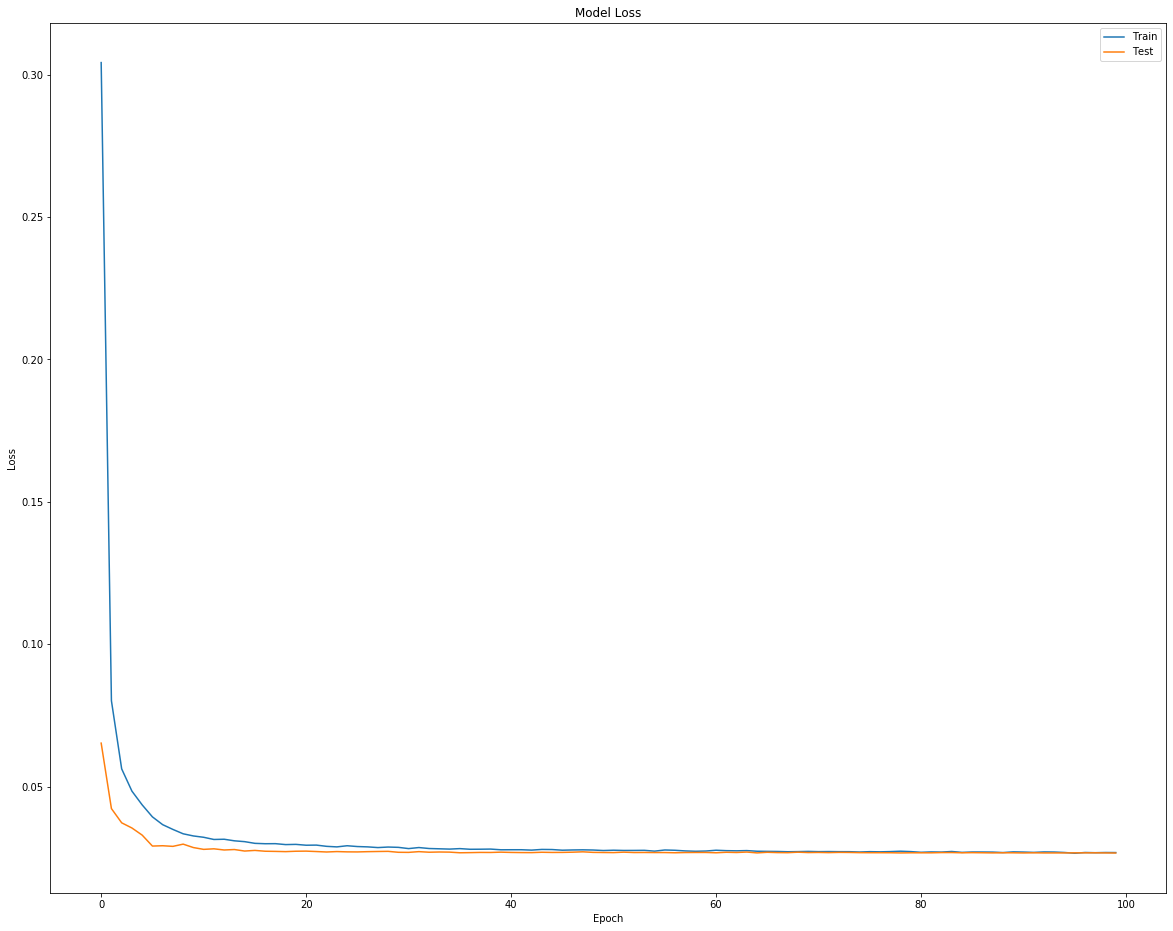

In [17]:
fig, ax = plt.subplots(figsize=(20, 16))

ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [18]:
pred = model.predict(x_val)

In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


def calculate_metrics(modelName, yTrue, yPred, average='binary'):
    """
    Calculate and print the performance metrics of a classification model.
    
    Parameters:
    modelName (str): The name of the classification model.
    yTrue (array-like): The true labels.
    yPred (array-like): The predicted labels.
    average (str or None, optional): The averaging method to use for multi-class classification. One of 
        {'micro', 'macro', 'weighted', 'binary'} or None (default: 'binary'). If None, only binary 
        classification metrics will be computed.
    
    Raises:
    ValueError: If `average` is not one of {'micro', 'macro', 'weighted', 'binary'} or None.
    
    """
    # Check if average parameter is valid
    if average != 'micro' and average != 'macro' and average != 'weighted' and average != 'binary' and average != None:
        print("Average must be one of this options: {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, default=’binary’")
        return
    
    # Prints the name of the model and calculate accuracy and precision
    print(f"--- Performance of {modelName} ---")
    acc = accuracy_score(y_true = yTrue, y_pred = yPred)
    precision = precision_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Accuracy : {np.round(acc*100,2)}%\nPrecision: {np.round(precision*100,2)}%')
    
    # Calculates and print recall and F1-score
    f1 = f1_score(y_true = yTrue, y_pred = yPred, average = average)
    recall = recall_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Recall: {np.round(recall*100,2)}%\nF1-score: {np.round(f1*100,2)}%')
    
    #auc_sklearn = roc_auc_score(y_true = yTrue, y_score = yPred, average = average)
    #print(f'Roc auc: {np.round(auc_sklearn*100,2)}%')
    
    # Calculates and prints balanced accuracy and classification report
    print(f"Balanced accuracy: {np.round(balanced_accuracy_score(yTrue, yPred)*100,2)}%")
    print(f"Classification report:\n{classification_report(yTrue, yPred)}")

In [20]:
pred_labels = np.argmax(pred, axis=1)

calculate_metrics("Neural Network", y_val, pred_labels, average='weighted')

--- Performance of Neural Network ---
Accuracy : 2.58%
Precision: 0.07%
Recall: 2.58%
F1-score: 0.13%
Balanced accuracy: 50.0%
Classification report:
              precision    recall  f1-score   support

           0       0.03      1.00      0.05      2310
           1       0.00      0.00      0.00     87228

    accuracy                           0.03     89538
   macro avg       0.01      0.50      0.03     89538
weighted avg       0.00      0.03      0.00     89538



/project/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/.local/lib/python3.6/site-packages/sklearn/metrics/_clas

In [21]:
def compute_metrics(pred, y_test):
    y_pred = np.round(pred).astype(int)
    
    correct = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy: {correct}")
    
    recall = metrics.recall_score(y_test, y_pred, average = 'weighted')    
    print(f"Recall: {recall}")
       
    precision = metrics.precision_score(y_test, y_pred, average = 'weighted')
    print(f"Precision: {precision}")
    
    f1score = metrics.f1_score(y_test, y_pred, average = 'weighted')
    print(f"F1Score: {f1score}")

In [22]:
compute_metrics(pred, y_val)

Accuracy: 0.9866537112734258
Recall: 0.9866537112734258
Precision: 0.9856366064256833
F1Score: 0.9858647123646486


-------------------------------------

**Result Plots**

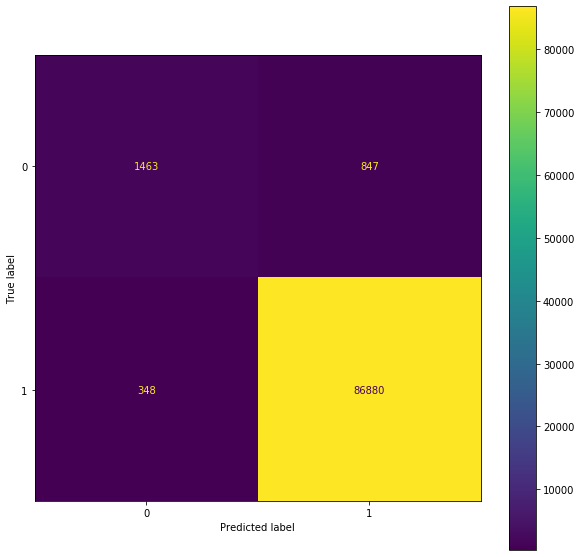

In [23]:
# Compute confusion matrix
y_pred = np.round(pred).astype(int)
cm = confusion_matrix(y_val, y_pred)

# Display confusion matrix
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10, 10))
cmd.plot(ax=ax)

In [24]:
# Usage of ExtraTreesClassifier for feature selection
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)
extra_tree_forest.fit(x, y)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

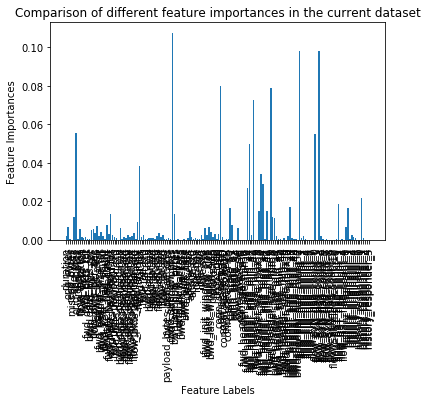

In [25]:
# Plor for the ExtraTreesClassifier output
plot.bar(x_columns, feature_importance_normalized)
plot.xlabel('Feature Labels')
plot.ylabel('Feature Importances')
plot.title('Comparison of different feature importances in the current dataset')
plot.xticks(rotation = 90)

# Plot size
plot.rcParams["figure.figsize"] = (70, 40)

plot.show()

## 